<a href="https://colab.research.google.com/github/vegaangga/PCVK_Genap_2022/blob/main/FinalProject_Klasifikasi_CNN_Tomato_2_kategori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google drive ke Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set directory dari Google drive

In [1]:
import os
base_dir = '/content/drive/MyDrive/Colab Notebooks/PCVK_2022/FinalProject/Dataset/'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_bacterialspot_dir = os.path.join(train_dir, 'Tomato_Bacterial_spot')

# Directory with our training dog pictures
train_earlyblight_dir = os.path.join(train_dir, 'Tomato_Early_blight')

# Directory with our validation cat pictures
validation_bacterialspot_dir = os.path.join(validation_dir, 'Tomato_Bacterial_spot')

# Directory with our validation dog pictures
validation_earlyblight_dir = os.path.join(validation_dir, 'Tomato_Early_blight')

Melihat isi dataset

In [3]:
train_bacterialspot_fnames = os.listdir(train_bacterialspot_dir)
train_bacterialspot_fnames.sort()
print(train_bacterialspot_fnames[:10])

train_earlyblight_fnames = os.listdir(train_earlyblight_dir)
train_earlyblight_fnames.sort()
print(train_earlyblight_fnames[:10])

['Tomato_Bacterial_Spot011.JPG', 'Tomato_Bacterial_Spot012.JPG', 'Tomato_Bacterial_Spot013.JPG', 'Tomato_Bacterial_Spot014.JPG', 'Tomato_Bacterial_Spot015.JPG', 'Tomato_Bacterial_Spot016.JPG', 'Tomato_Bacterial_Spot017.JPG', 'Tomato_Bacterial_Spot018.JPG', 'Tomato_Bacterial_Spot019.JPG', 'Tomato_Bacterial_Spot020.JPG']
['Tomato_Early_Blight011.JPG', 'Tomato_Early_Blight012.JPG', 'Tomato_Early_Blight013.JPG', 'Tomato_Early_Blight014.JPG', 'Tomato_Early_Blight015.JPG', 'Tomato_Early_Blight016.JPG', 'Tomato_Early_Blight017.JPG', 'Tomato_Early_Blight018.JPG', 'Tomato_Early_Blight019.JPG', 'Tomato_Early_Blight020.JPG']


data train harus lebih banyak daripada data validasi

In [4]:
print('total training bacterial spot images:', len(os.listdir(train_bacterialspot_dir)))
print('total training ealy blight images:', len(os.listdir(train_earlyblight_dir)))
print('total validation bacterial spot images:', len(os.listdir(validation_bacterialspot_dir)))
print('total validation ealy blight images:', len(os.listdir(validation_earlyblight_dir)))

total training bacterial spot images: 100
total training ealy blight images: 100
total validation bacterial spot images: 10
total validation ealy blight images: 10


Menampilkan beberapa sampel citra

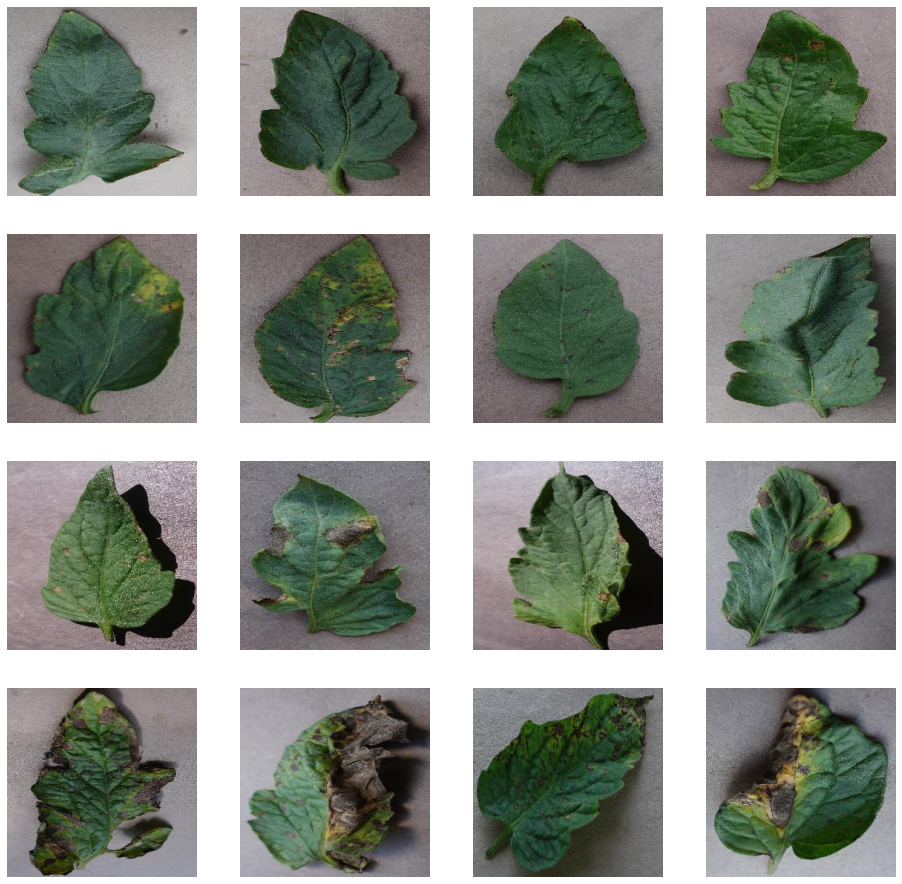

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_bacterialspot_pix = [os.path.join(train_bacterialspot_dir, fname) 
                for fname in train_bacterialspot_fnames[pic_index-8:pic_index]]
next_earlyblight_pix = [os.path.join(train_earlyblight_dir, fname) 
                for fname in train_earlyblight_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_bacterialspot_pix+next_earlyblight_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Import library tensorflow

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Model #ada library sequential

Setting arsitektur CNN (Konvolusi)

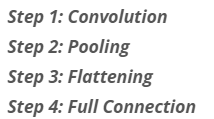

In [7]:
#layer input (citra masukan)
img_input = layers.Input(shape=(150, 150, 3)) #direshape dg ukuran 150x150 dg tetap 3 channel

# 3 kali di proses konvulasi menggunakan 3 layer konvulasi dan 3 layer maxpooling

# Konvulasi pertama menggunakan 16 filter dengan mask dengan ukuran 3x3
# menggunakan aktivasi relu (aktivasi ada 2: relu dan sigmoid)
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x) # Fungsi dari pooling ini adalah untuk mereduksi input secara spasial (mengurangi jumlah parameter) dengan operasi down-sampling

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x) 

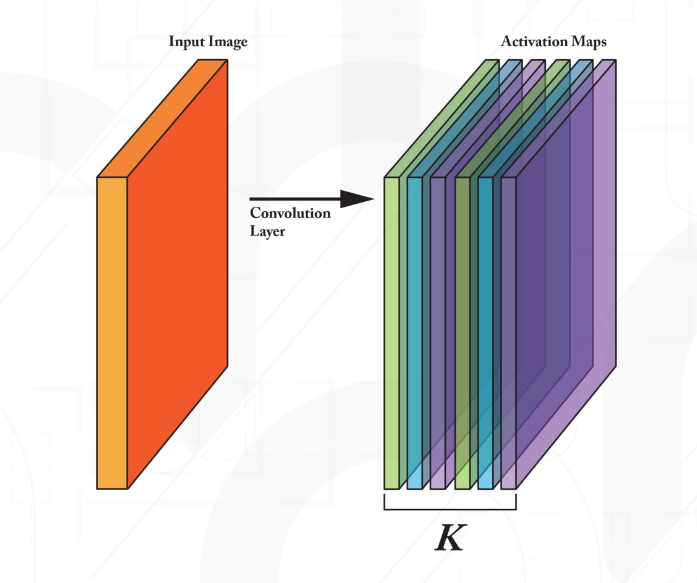

CNN adalah kumpulan dari convolutional layer, activation function, dan pooling layer. Seperti yang telah disampaikan di post sebelumnya, tidak ada aturan khusus mengenai letak maupun ukuran dari parameter yang digunakan

Setting arsitektur CNN (Fully Connected layer)

In [8]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

Compile CNN

In [9]:
from tensorflow.keras.optimizers import RMSprop

#memanggil fungsi compile
model.compile(loss='binary_crossentropy', #karena menggunakan 2 class jadi mewnggunakan loss 'binary_crossentropy'
              optimizer=RMSprop(lr=0.001), 
              metrics=['acc']) #metrics yang digunakan adalah acc

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Setting preparasi dataset dan augmentasi data train

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20, #berapa citra yang di olah dg sekali jalan
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 200 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Proses training, bisa membutuhkan waktu beberapa menit

In [11]:
import keras as tf
# define the checkpoint
checkpoint_filepath="/content/drive/MyDrive/Colab Notebooks/PCVK_2022/FinalProject/Dataset/epoch/baru/tomato-{epoch:02d}-{acc:.4f}-{val_acc:.4f}.h5"
model_checkpoint_callback = tf.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  # 200 images = batch_size * steps
      epochs=25,
      validation_data=validation_generator,
      validation_steps=2,  # 10 images = batch_size * steps
      callbacks=[model_checkpoint_callback])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
10/10 [==============================] - 76s 6s/step - loss: 1.8157 - acc: 0.5400 - val_loss: 0.6707 - val_acc: 0.5000
Epoch 2/25
10/10 [==============================] - 2s 216ms/step - loss: 0.7955 - acc: 0.5400 - val_loss: 0.6533 - val_acc: 0.6500
Epoch 3/25
10/10 [==============================] - 2s 188ms/step - loss: 0.6479 - acc: 0.6100 - val_loss: 0.6344 - val_acc: 0.5000
Epoch 4/25
10/10 [==============================] - 2s 207ms/step - loss: 0.6375 - acc: 0.6850 - val_loss: 0.4947 - val_acc: 0.8000
Epoch 5/25
10/10 [==============================] - 2s 188ms/step - loss: 0.5270 - acc: 0.7450 - val_loss: 1.4816 - val_acc: 0.5000
Epoch 6/25
10/10 [==============================] - 2s 206ms/step - loss: 0.5073 - acc: 0.7950 - val_loss: 0.9674 - val_acc: 0.6500
Epoch 7/25
10/10 [==============================] - 2s 208ms/step - loss: 0.7593 - acc: 0.7850 - val_loss: 0.5099 - val_acc: 0.7500
Epoch 8/25
10/10 [==============================] - 2s 177ms/step - loss: 0.39

Menampilkan grafik selama pelatihan

Text(0.5, 1.0, 'Validation loss')

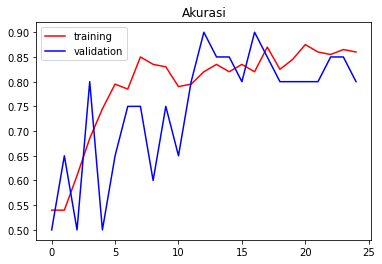

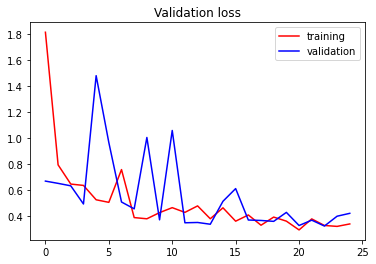

In [12]:
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs,acc,'r',label='training')
plt.plot(epochs,val_acc,'b',label='validation')
plt.legend()
plt.title('Akurasi')

plt.figure()

# Plot training and validation loss per epoch
#plt.plot(epochs, loss)
#plt.plot(epochs, val_loss)

plt.plot(epochs,loss,'r',label='training')
plt.plot(epochs,val_loss,'b',label='validation')
plt.legend()
plt.title('Validation loss')

Memprediksi data uji

Load model

In [13]:
from tensorflow.keras.models import load_model

DIR = '/content/drive/MyDrive/Colab Notebooks/PCVK_2022/FinalProject/Dataset/epoch/baru/'
# load model
model = load_model(DIR+'tomato-07-0.8250-0.8500.h5')

Menyiapkan data uji

In [14]:
import numpy
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


Found 20 images belonging to 2 classes.


Prediksi

In [15]:
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.round(predictions, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Menyiapkan label kelas

In [19]:
from keras import metrics
true_classes = test_data_generator.classes
class_labels = ['bacterial spot','early blight']

#for i in range(2):
#  class_labels.append("kelas_"+str(i))
#print(len(class_labels))

Report hasil

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))

report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

[[4 6]
 [2 8]]
                precision    recall  f1-score   support

bacterial spot     0.6667    0.4000    0.5000        10
  early blight     0.5714    0.8000    0.6667        10

      accuracy                         0.6000        20
     macro avg     0.6190    0.6000    0.5833        20
  weighted avg     0.6190    0.6000    0.5833        20



Saving 00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG to 00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG
00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG
This image belongs to class Tomato_Early_blight


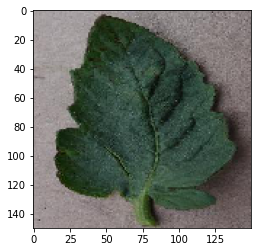

In [23]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  # prediction images

  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j-1])
      break